In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *
%matplotlib inline

fig_name1 = "SWIM_Qscore"
fig_name2 = "SWIM_closest_atom_distance"
figsizeA = (4,1.2)
figsizeC = (8,1.2)
linewidth = 2
ticksize = 12
labelsize = 14
titlesize = 16
dpi = 400
mg_color = '#00af2b'
h2o_color = '#df0303'
mg_light_color = '#b2e7bf'
h2o_light_color = '#f29a9a'
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

qscore_22_file = QSCORE_22
qscore_23_file = QSCORE_23

# read and format Qscores
col_names = ['atom_name','residue_number','residue_name','x_coord','y_coord','z_coord','Qscore']

qscore_22 = pd.read_csv(qscore_22_file,names=col_names)
qscore_22["residue_number"] = qscore_22.residue_number.apply(lambda x: int(x.split(".")[0]))
qscore_23 = pd.read_csv(qscore_23_file,names=col_names)
qscore_23["residue_number"] = qscore_23.residue_number.apply(lambda x: int(x.split(".")[0]))

In [6]:
dist22 = pd.read_csv("22A_mg_water_closest_atoms.csv")
dist23 = pd.read_csv("23A_mg_water_closest_atoms.csv")

def plot_dist_closest(df,ax,mod): 
    order = ['Mg²⁺-Oᴿᴺᴬ', 'Mg²⁺-Nᴿᴺᴬ', 'Mg²⁺-H₂O', 'H₂O-Oᴿᴺᴬ', 'H₂O-Nᴿᴺᴬ', 'H₂O-Cᴿᴺᴬ', 'H₂O-H₂O', 'H₂O-Mg²⁺']
    pal = {x:mg_color if x[0]=="M" else h2o_color for x in order}
    ax.hlines(2.5,-0.5,7.5,color="black",linestyles="dashed",linewidth=2)
    g=sns.violinplot(data=df, y="min_dist", x="bond",cut=0,palette=pal,inner=None,scale="count",linewidth=0,order=order[::-1],ax=ax,width=0.9)
    g.set_xlim((7.5,-0.5))
    g.set_ylim(1.7,3.5)
    g.set_xlabel("Mg²⁺                         H₂O \nClosest Interaction",size=labelsize)
    g.set_ylabel("Distance (Å)",size=labelsize)
    print(g.get_xticks())
    print(order)
    x = [x.split('-')[-1] for x in order]
    print(x)
    ax.set_xticks(g.get_xticks(),x[::-1])
    ax.tick_params(axis='y', labelsize=ticksize)
    ax.tick_params(axis='x', labelsize=ticksize,rotation=0)
    g.set_title(f"{mod}Å model",size=titlesize)
    for i,bond in enumerate(order[::-1]):
        number = len(df[(df.bond==bond)])
        if pal[bond]==h2o_color: y = 2.0
        else: y=2.6
        ax.text(i,y,number,color=pal[bond],size=ticksize,ha="center")
    
def plot_qscore_wat_mg(df,ax,mod):
    order = [ "Mg²⁺","H₂O"]
    pal = {"Mg²⁺":mg_color,"H₂O":h2o_color}
    q22 = df[df.residue_name.isin(["HOH","MG"])].copy()
    q22["residue_type"] = q22.residue_name.apply(lambda x: "Mg²⁺" if x=="MG" else "H₂O")
    g=sns.violinplot(data=q22, y="Qscore", x="residue_type",cut=0,palette=pal,inner=None,scale="count",linewidth=0,order=order[::-1],ax=ax,width=0.9)
    
    g.set_ylim((0.6,1.0))
    g.set_xlim((1.5,-0.5))
    g.set_ylabel("Q-score",size=labelsize)
    g.set_title(f"{mod}Å model",size=titlesize)
    g.set_xlabel('')
    #g.set_xlabel(f"Solvent",size=labelsize,labelpad=-8)
    ax.tick_params(axis='y', labelsize=ticksize)
    ax.tick_params(axis='x', labelsize=ticksize)
    avgQIon =  -0.1103 * mod + 1.0795 # ion
    avgQWater =  -0.0895 * mod + 1.0001 # water
    ax.hlines(avgQWater,-0.5,0.5,color="grey",linestyles="dashed",linewidth=2)
    ax.hlines(avgQIon,0.5,1.5,color="grey",linestyles="dashed",linewidth=2)
    for i,bond in enumerate(order[::-1]):
        number = len(q22[(q22.residue_type==bond)])
        ax.text(i,0.95,number,color=pal[bond],size=ticksize,ha="center")
    sns.despine()

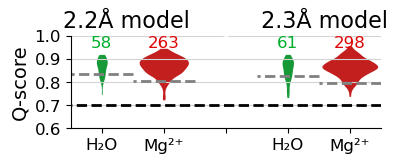

In [14]:
def plot_qscore_wat_mg_both(df,df2,mod):
    order = [ "Mg²⁺a","H₂Oa",'n',"Mg²⁺b","H₂Ob"]
    pal = {"Mg²⁺a":mg_color,"H₂Oa":h2o_color,"Mg²⁺b":mg_color,"H₂Ob":h2o_color,'n':'white'}
    q22 = df[df.residue_name.isin(["HOH","MG"])].copy()
    q23 = df2[df2.residue_name.isin(["HOH","MG"])].copy()
    q22['l']='a'
    q23['l']='b'
    q22 = pd.concat([q22,q23])
    q22["residue_type"] = q22.apply(lambda x: "Mg²⁺"+x.l if x.residue_name=="MG" else "H₂O"+x.l,axis=1)
    g=sns.violinplot(data=q22, y="Qscore", x="residue_type",cut=0,
                     hue='residue_type',legend=False,
                     palette=pal,inner=None,
                     density_norm='count',common_norm=True,#scale="count",
                     linewidth=0,order=order[::-1],width=0.9)
    
    g.set_ylim((0.6,1.0))
    g.set_xlim((4.5,-0.5))
    g.set_ylabel("Q-score",size=labelsize)
    g.set_title(f"2.2Å model          2.3Å model",size=titlesize)
    g.set_xlabel('')
    #g.set_xlabel(f"Solvent",size=labelsize,labelpad=-8)
    g.tick_params(axis='y', labelsize=ticksize)
    g.tick_params(axis='x', labelsize=ticksize)
    avgQIon =  -0.1103 * mod[1] + 1.0795 # ion
    avgQWater =  -0.0895 * mod[1] + 1.0001 # water
    g.hlines(avgQWater,-0.5,0.5,color="grey",linestyles="dashed",linewidth=2)
    g.hlines(avgQIon,0.5,1.5,color="grey",linestyles="dashed",linewidth=2)
    avgQIon =  -0.1103 * mod[0] + 1.0795 # ion
    avgQWater =  -0.0895 * mod[0] + 1.0001 # water
    g.hlines(avgQWater,2.5,3.5,color="grey",linestyles="dashed",linewidth=2)
    g.hlines(avgQIon,3.5,4.5,color="grey",linestyles="dashed",linewidth=2)
    g.hlines(0.7,-0.5,4.5,color="black",linestyles="dashed",linewidth=2)
    for i,bond in enumerate(order[::-1]):
        number = len(q22[(q22.residue_type==bond)])
        g.text(i,0.95,number,color=pal[bond],size=ticksize,ha="center")
    sns.despine()

fig,axes = plt.subplots(1,1,figsize=figsizeA)

plot_qscore_wat_mg_both(qscore_22,qscore_23,[2.2,2.3])
axes.yaxis.grid(True, which='both')
axes.set_yticks([0.6,0.7,0.8,0.9,1.0])
axes.set_xticks(axes.get_xticks(),[ "Mg²⁺","H₂O",'',"Mg²⁺","H₂O"])
axes.yaxis.grid(True, which='major',color="lightgrey")

fig.subplots_adjust(hspace=0.4,wspace=0.1)
plt.savefig(f"{fig_name1}.png",dpi=dpi, bbox_inches="tight",transparent=True)
plt.savefig(f"{fig_name1}.svg", bbox_inches="tight",transparent=True)

{'Mg²⁺-Oᴿᴺᴬ': '#00af2b', 'Mg²⁺-Nᴿᴺᴬ': '#00af2b', 'Mg²⁺-H₂O': '#00af2b', 'H₂O-Oᴿᴺᴬ': '#df0303', 'H₂O-Nᴿᴺᴬ': '#df0303', 'H₂O-Cᴿᴺᴬ': '#df0303', 'H₂O-H₂O': '#df0303', 'H₂O-Mg²⁺': '#df0303'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
['Mg²⁺-Oᴿᴺᴬa', 'Mg²⁺-Nᴿᴺᴬa', 'Mg²⁺-H₂Oa', 'H₂O-Oᴿᴺᴬa', 'H₂O-Nᴿᴺᴬa', 'H₂O-Cᴿᴺᴬa', 'H₂O-H₂Oa', 'H₂O-Mg²⁺a', 'n', 'Mg²⁺-Oᴿᴺᴬb', 'Mg²⁺-Nᴿᴺᴬb', 'Mg²⁺-H₂Ob', 'H₂O-Oᴿᴺᴬb', 'H₂O-Nᴿᴺᴬb', 'H₂O-Cᴿᴺᴬb', 'H₂O-H₂Ob', 'H₂O-Mg²⁺b']
['Oᴿᴺᴬ', 'Nᴿᴺᴬ', 'H₂O', 'Oᴿᴺᴬ', 'Nᴿᴺᴬ', 'Cᴿᴺᴬ', 'H₂O', 'Mg²⁺', '', 'Oᴿᴺᴬ', 'Nᴿᴺᴬ', 'H₂O', 'Oᴿᴺᴬ', 'Nᴿᴺᴬ', 'Cᴿᴺᴬ', 'H₂O', 'Mg²⁺']


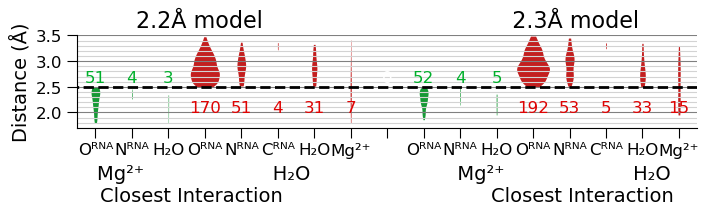

In [20]:
def plot_dist_closest_both(df,df2): 
    order = ['Mg²⁺-Oᴿᴺᴬ', 'Mg²⁺-Nᴿᴺᴬ', 'Mg²⁺-H₂O', 'H₂O-Oᴿᴺᴬ', 'H₂O-Nᴿᴺᴬ', 'H₂O-Cᴿᴺᴬ', 'H₂O-H₂O', 'H₂O-Mg²⁺']
    pal = {x:mg_color if x[0]=="M" else h2o_color for x in order}
    df['l']='a'
    df2['l']='b'
    df = pd.concat([df,df2])
    order = [x+'a' for x in order] + ['n']+ [x+'b' for x in order]
    pal2 = {x+'a':y for x,y in pal.items()}
    pal2.update({x+'b':y for x,y in pal.items()})
    pal2.update({'n':'white'})
    print(pal)
    df['bond'] = df.bond+df.l
    g=sns.violinplot(data=df, y="min_dist", x="bond",cut=0,
                     hue='bond',legend=False,
                     palette=pal2,inner=None,
                     density_norm='count',common_norm=True,#scale="count",
                     linewidth=0,order=order[::-1],width=0.9)
    g.set_xlim((16.5,-0.5))
    g.set_ylim(1.7,3.5)
    g.set_xlabel("Mg²⁺                     H₂O                        Mg²⁺                     H₂O \nClosest Interaction                                  Closest Interaction",size=labelsize)
    g.set_ylabel("Distance (Å)",size=labelsize)
    print(g.get_xticks())
    print(order)
    x = [x.split('-')[-1][:-1] for x in order]
    print(x)
    g.hlines(2.5,-0.5,16.5,color="black",linestyles="dashed",linewidth=2)
    g.set_xticks(g.get_xticks(),x[::-1])
    g.tick_params(axis='y', labelsize=ticksize)
    g.tick_params(axis='x', labelsize=ticksize,rotation=0)
    g.set_title(f"2.2Å model                                   2.3Å model",size=titlesize)
    for i,bond in enumerate(order[::-1]):
        number = len(df[(df.bond==bond)])
        if pal2[bond]==h2o_color: y = 2.0
        else: y=2.6
        g.text(i,y,number,color=pal2[bond],size=ticksize,ha="center")
fig,axes = plt.subplots(1,figsize=figsizeC)

plot_dist_closest_both(dist22,dist23)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_yticks([2.0,2.5,3.0,3.5])

axes.yaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.grid(True, which='major',color="grey")
axes.yaxis.grid(True, which='minor',color="lightgrey")

axes.tick_params(which='major', length=7)
axes.tick_params(which='minor', length=0, color='r')

plt.savefig(f"{fig_name2}.png",dpi=dpi, bbox_inches="tight",transparent=True)
plt.savefig(f"{fig_name2}.svg", bbox_inches="tight",transparent=True)